# Assignment 2
### Learning Outcomes 
By completing this assignment, you will gain and demonstrate skills relating to 
- working within the python environment  
- visualizing of numerical data continued 
- tabulation and plotting of discrete data 
- Calculating joint, marginal, and conditional probabilities  
- Summarizing and plotting numerical data by group 

### Problem Description
We will use the same dataset on incomes from last week (income_dataset.csv). 

The data set has the following data columns:
- age: Age in years
- workclass: Classification of workplace:
    - Private: Employed in private company
    - Local-gov: Local government
    - State-gov: State government
    - Federal-gov: Federal government 
    - Self-emp-inc: Self employed in own company
    - Self-emp-not-inc: Self employed in other legal format
- education: Education level
- educational-num: Numerical level of education 
- marital-status
- occupation 
- race
- gender
- capital-gain: Annual gains from capital investments as reported in tax return 
- capital-loss: Annual loss from capital investments 
- hours-per-week: Self-reported number of hours per week worked 
- native-country: Country of birth 
- income: Annual salary in USD (without capital gains)
- month_of_birth: Birth month (1-12)

You are allowed to use numpy, pandas, matplotlib, and seaborn packages - please do not use other packages that are not supported in the course. 

To solve this homework, you are expected to read portions of the Python for Data Analysis textbook - or use the online documentation on Python. To help you not get lost, we will point you to the relevant book section for the various tasks. However, you may have to go back and read some basics if you realize that you are missing understanding on some foundational concept. 

### Overview of plotting
As an introduction to matplotlib, step through this https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb. It is suggested that you download the notebook and run it locally to fully benefit from the tutorial.
Specific information (and further tutorials) on the various plotting functions can be found here: https://matplotlib.org/stable/users/index.html.  

### Submit via Gradescope
Please use this jupyter notebook to fill in the answers below. Before submitting, please make sure that your notebook runs correctly by restarting the kernel and rerunning the entire notebook - all outputs should be included (do **not** clear the output before submitting). Save the notebook as YourUserID_Assign01.ipynb and ensure that you have the correct file saved. Submit your notebook file by clicking on the Gradescope symbol on the left bar of the OWL page.  
Make sure that you develop your code with Python 3.7 or higher as the interpreter. The TA will not endeavor to fix code that uses earlier versions of Python (e.g. 2.7). 

### General Marking criteria:
- Does the program behave according to specifications?
- Are you using appropriate data structures?
- Is the output according to specifications?
- Are all questions answered fully? Written responses must be answered in full English sentences.
- Comments for pieces of code that are longer than few line 
- All figures require axis labels 
- All Figures require an informative caption
- Use Python coding conventions and good programming techniques, for example:
    * meaningful variable names
    * conventions for naming variables and constants
    * Use of constants where appropriate
    * Readability: indention, white space, consistency.

**Note that the Assignments are marked pass/fail - the points are just indicative of what the question would be worth if we graded out of 100\%. To pass, you need to show a good faith attempt at solving each of the problems. For midterm and final (open book) the above criteria will be strongly enforced, so it is good if you get used to the criteria.**

## Task 1: Plotting histograms II (Subplots) (? / 15 points)
Preliminaries: Import the packages relevant to this Assignment

In case you notebook environment is not automatically setup to include the figures inline, you may have to run the following code: <br>
import matplotlib <br>
matplotlib.use('TkAgg') <br>
%matplotlib inline <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Question 1.1. Load the income dataset and calculate the new column "total" as the income + capital-gain - capital-loss (? / 2 points)

In [3]:
df = pd.read_csv("income_dataset.csv")

df['total'] = df['income'] + df['capital-gain'] - df['capital-loss']



Hint: For variables with discrete integer values (age, educational-num,month-of-birth, hours-per-week), it is natural to have a separate bin for each unique value. For this you need to set the number of bins to the range of the data. 
To see what happens when you do not do this, plot a histogram of age with either 50 or 100 bins. 
### Question 1.2. Generate a new figure with an array of 6 subplots (2 rows and 3 columns recommended, see pages 220-223). In the subplots, provide a histogram for the variables age, educational-num, income, month of birth, hours per week, and total. For each variable, choose an appropriate number of bins (? / 4 points)

Text(0.5, 1.0, 'Total')

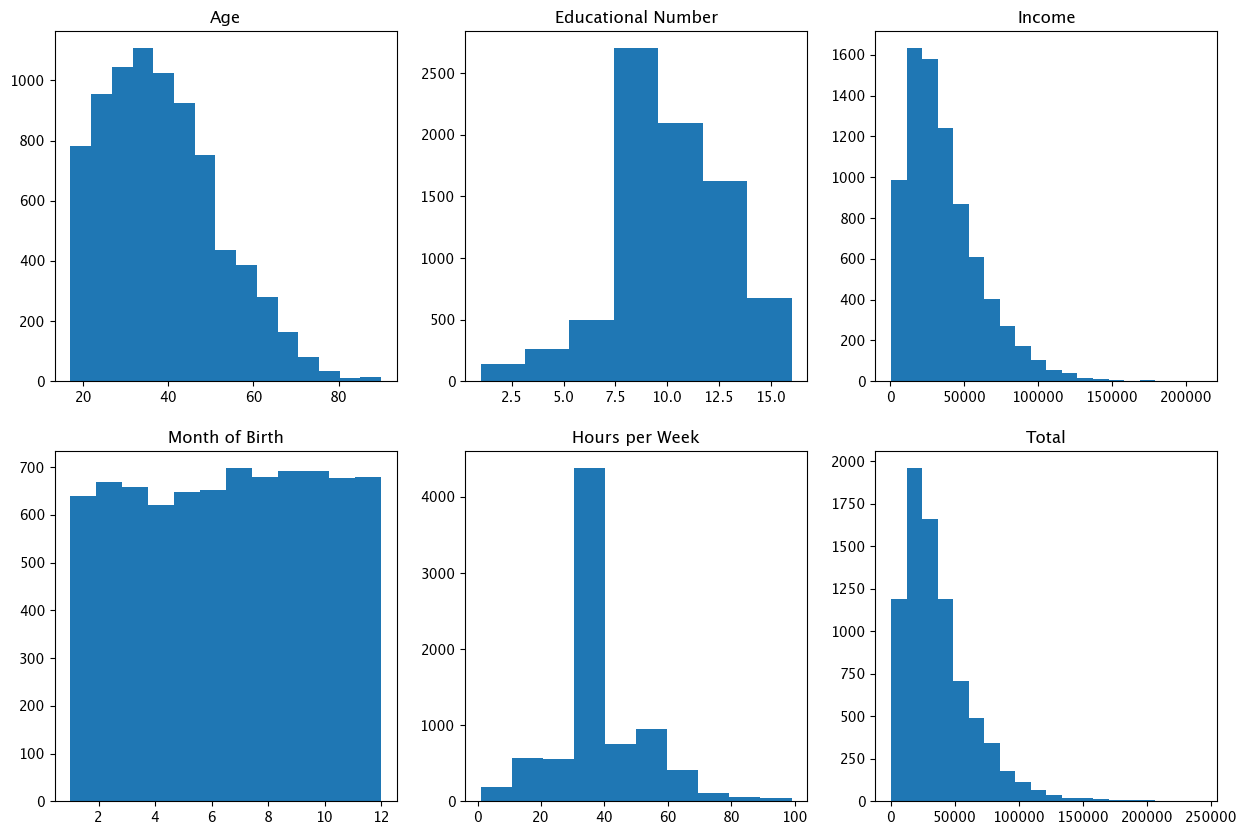

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

axes[0, 0].hist(df['age'], bins = 15)
axes[0, 0].set_title('Age')


axes[0, 1].hist(df['educational-num'], bins = 7)
axes[0, 1].set_title('Educational Number')

axes[0, 2].hist(df['income'], bins = 20)
axes[0, 2].set_title('Income')

axes[1, 0].hist(df['month_of_birth'], bins = 12)
axes[1, 0].set_title('Month of Birth')

axes[1, 1].hist(df['hours-per-week'], bins = 10)
axes[1, 1].set_title('Hours per Week')

axes[1, 2].hist(df['total'], bins = 20)
axes[1, 2].set_title('Total')




### Question 1.3. Written response: Justify the number of bins chosen for each variable. ( ? / 3 points)

age: 15 bins to not have too much rounding to one interval and to show the range properly.
educational-num: 10 bins to show the range properly.
income: 20 bins show more detail and the tail of the distribution.
month of birth: 12 bins because there are 12 months in a year.
hours per week: 10 bins 
total: 20 bins to show the tail well.

### Question 1.4: Describe the shape of the distribution for each variable, including the number of modes and the shape (symmetric, skew, uniform?).  (? / 6 points)

age: Unimodal. Right skewed.
educational-num: Unimodal. Left skewed.
income: Unimodal. Right Skewed.
month of birth: Uniform.
hours per week: Unimodal. Symmetric.
total: Unimodal. Right Skewed.

## Task 2: Tabulating and visualizing categorical data (pg. 24-30 and pg 250-256) (? / 20 points)

### Question 2.1. Create a contingency table of gender (rows) by workclass (columns) without the marginal sums. You may normalize the table by rows or columns. Print to the screen. (? / 4 points)

In [33]:
table = pd.crosstab(df['gender'], df['workclass'], margins = False)

display(table)

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
gender,,,,,,
Female,76,209,1903,33,108,131
Male,145,305,3684,233,508,213


### Question 2.2. Plot the workclass counts by gender as a grouped bar chart (? / 3 points)

<Axes: xlabel='gender'>

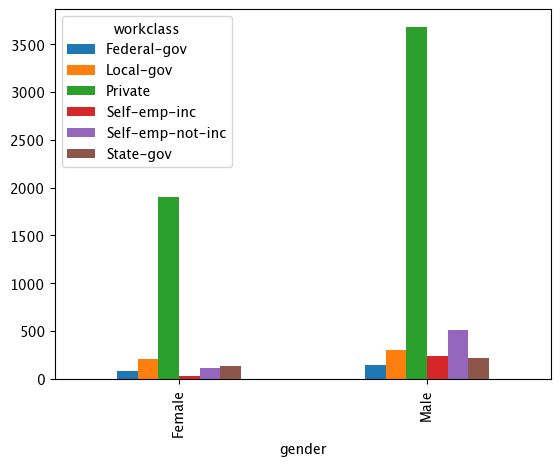

In [35]:
table.plot(kind = 'bar', subplots = False)

### Question 2.3. Make a Figure with 2 subplots. Plot the workclass counts by gender as a grouped bar chart (as in Question 2) in one subplot, and as a stacked barchart the other subplot. (? / 3 points)

<Axes: xlabel='gender'>

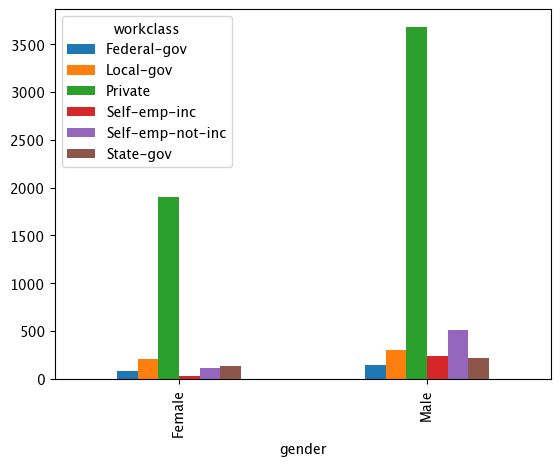

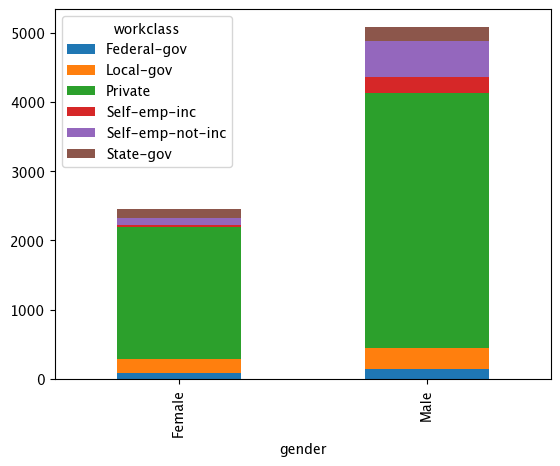

In [48]:
table.plot(kind = 'bar', subplots = False)
table.plot(kind = 'bar', stacked = True)

### Question 2.4. Generate a table of gender (rows) and workclass (columns), normalized by the row-marginal counts of males and females , such that you have *conditional probabilities of workclass, given the gender* . Print the table and make a stacked barplot of these conditional probabilities. (? / 3 points)

Hint: Please check the lecture carefully for the definition of a *conditional probability* and how to compute it. We are looking here for $p(workclass | gender)$.

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
gender,,,,,,
Female,0.030894,0.084959,0.773577,0.013415,0.043902,0.053252
Male,0.028498,0.059945,0.724057,0.045794,0.099843,0.041863


<Axes: xlabel='gender'>

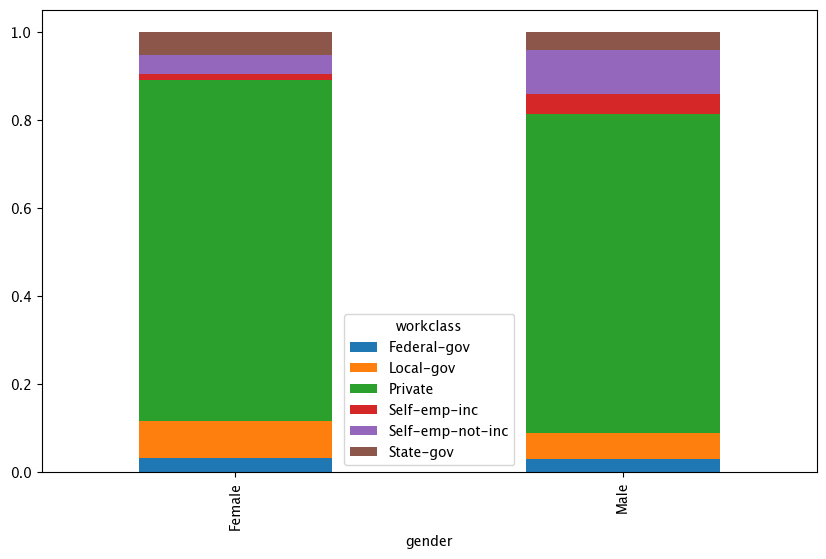

In [66]:
table1 = pd.crosstab(df['gender'], df['workclass'])
#display(table1)
conditional_probabilities = table1.div(table1.sum(axis=1), axis=0)

display(conditional_probabilities)    


conditional_probabilities.plot(kind='bar', stacked=True, figsize=(10, 6))


### Question 2.5. Generate a table of workclass (rows) and gender (columns), with the *conditional probabilities of the gender, given the workclass*.  Print the table and show the conditional probabilities as a stacked barplot for each workclass. Written answer: What is the height of the stacked bar (males + females) for each workclass and why? (? / 3 points)
Hint: Again - check the definition of conditional probability to determine whether you need to normalize the counts by the sum of the rows (index) or columns. 

gender,Female,Male
workclass,,
Federal-gov,0.343891,0.656109
Local-gov,0.406615,0.593385
Private,0.340612,0.659388
Self-emp-inc,0.124060,0.875940
Self-emp-not-inc,0.175325,0.824675
State-gov,0.380814,0.619186


<Axes: xlabel='workclass'>

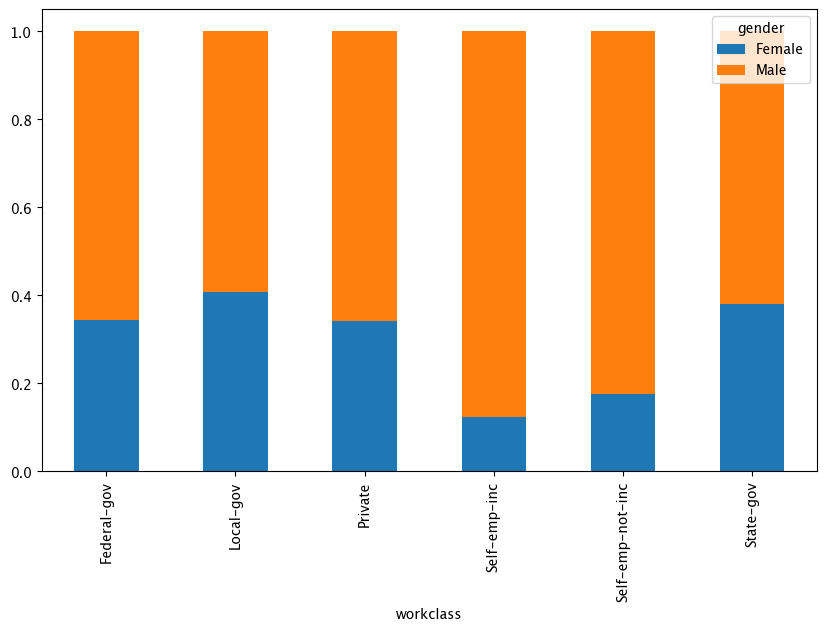

In [65]:
table2 = pd.crosstab(df['workclass'], df['gender'])
#display(table1)
conditional_probabilities = table2.div(table2.sum(axis=1), axis=0)

display(conditional_probabilities)    


conditional_probabilities.plot(kind='bar', stacked=True, figsize=(10, 6))

The height of each workclass is 1. This is the sum of the probability of selecting a male or female in a workclass.

### Question 2.6. Written response: Compare the 2 plots from questions 4 and 5. For each plot, describe which aspect of the data can be most readily seen (? / 4 points)

From table 1, we see that private workclass is the most likely workclass and that both male and females have a similar distribution of workclasses.
From table 2, we see that there are more males than females in all workclasses.

## Task 3: Probabilities (? / 20 points)

For each of the questions in this task, you  should show the formula you used to compute the probability. <br>
For each of the tasks in this section, print the answer in a full sentence. For instance, your output should not just be a value but instead: <br>
__Probability of being employed in a private company given that the gender is male, is 0.xxx__ <br>
Using the contingency tables, compute and print.

### Question 3.1. The marginal probability of a person in the sample being employed by the federal government (? / 2 points)

In [71]:
table = pd.crosstab(df["gender"], df["workclass"], margins = True)
display(table)
p = table["Federal-gov"]["All"]/table["All"]["All"]

print(f"The marginal probability of being employed by the federal government is {p}")


workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,All
gender,,,,,,,
Female,76,209,1903,33,108,131,2460
Male,145,305,3684,233,508,213,5088
All,221,514,5587,266,616,344,7548


Probability of being employed by the federal government is 0.02927927927927928


### Question 3.2. the marginal probability being employed by a private company (? / 2 points)

In [72]:
p = table["Private"]["All"]/table["All"]["All"]

print(f"The marginal probability of being employed by a private company is {p}")

Probability of being employed by a private company is 0.7401960784313726


### Question 3.3. the marginal probability in the sample of being female (? / 2 points)

In [73]:
p = table["All"]["Female"]/table["All"]["All"]

print(f"The marginal probability of being female is {p}")

Probability of being female is 0.32591414944356123


### Question 3.4. the conditional probability of being employed in Local Government given that the gender is female (? / 2 points)

In [76]:
p = table["Local-gov"]["Female"]/table["All"]["Female"]

print(f"The conditional probability of being employed by in local govenment given that the gender is female is {p}")

Probability of being employed by in local govenment given that the gender is female is 0.08495934959349594


### Question 3.5. the conditional probability of being employed in Local Government given that the gender is male (? / 2 points)

In [77]:
p = table["Local-gov"]["Male"]/table["All"]["Male"]

print(f"The conditional probability of being employed by in local govenment given that the gender is male is {p}")

Probability of being employed by in local govenment given that the gender is male is 0.05994496855345912


### Question 3.6. the conditional probability of the gender being female given that the person is employed in Local government (? / 2 points)

In [78]:
p = table["Local-gov"]["Female"]/table["Local-gov"]["All"]

print(f"The conditional probability of the gender being female given that the person is employed in local government {p}")

Probability of the gender being female given that the person is employed in local government 0.4066147859922179


### Question 3.7.  the conditional probability of the gender being male given that the person is employed in Local government  (? / 2 points)

In [79]:
p = table["Local-gov"]["Male"]/table["Local-gov"]["All"]

print(f"The conditiona probability of the gender being male given that the person is employed in local government {p}")

Probability of the gender being male given that the person is employed in local government 0.5933852140077821


### Question 3.8. How does the probability of  female change from when you don’t know the workclass to when you know that the person works in local government?  (? / 2 points)

The probability of female changes from when I dont know the workclass to when I know the person works in local government by increasing form 33% (2460/7548) to 41%

### Question 3.9. What is the joint probability of a person being female AND employed in Local government? (? / 2 points)

In [81]:
p = table["Local-gov"]["Female"]/table["All"]["All"]

print(f"The joint probability of a person being female and employed in local government is {p}")

The joint probability of a person being female and employed in local government is 0.027689454160042395


### Question 3.10. What is the expected probability of being in local government AND being female IF gender and workclass were independent? (? / 2 points)

In [82]:
p = table["Local-gov"]["All"]/table["All"]["All"] * table["All"]["Female"]/table["All"]["All"]

#P(A and B) = P(A) x P(B)
print(f"The expected probability of being in local government and female if gender and workclass is independent is {p}")

The expected probability of being in local government and female if gender and workclass is independent is 0.02219394181425417


## Task 4: Descriptive Statistics by Category (pg 24-30 and pg 250-256) (? / 20 points)

### Question 4.1. Using pandas statistics functions (pg. 137-141) and the groupby method determine the mean income by gender. (? / 5 points)

In [86]:
a = df['income'].groupby(df['gender']).mean()
print(a)

gender
Female    29958.721035
Male      39205.211701
Name: income, dtype: float64


### Question 4.2. Determine and print the mean income by workclass. For this question use a for loop to iterate over the different workclasses that exist. This needs to be done in three steps (? / 15 points)

You need to use a for loop here- do not simply write down individual print statements 

#### a. Use the groupby function to calculate the mean by workclass (? / 3 points)

In [90]:
a = df['income'].groupby(df['workclass']).mean()


#### b. Create a variable that stores the names of each workclass  (? / 3 points)


In [91]:
table = pd.crosstab(df['gender'], df['workclass'])

workclass_names = table.columns.tolist()

print(workclass_names)

['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov']


#### c. Iterate over this variable using a for loop and print the means for each category using a full sentence of the form "The mean income for an xxxx  is yyyy. (? / 9 points)

In [95]:
for i in workclass_names:
    print(f"The mean income for an {i} is {a.loc[i]}")

The mean income for an Federal-gov is 45349.36199095022
The mean income for an Local-gov is 38897.74513618677
The mean income for an Private is 34924.67066404152
The mean income for an Self-emp-inc is 49726.16541353383
The mean income for an Self-emp-not-inc is 39795.9025974026
The mean income for an State-gov is 38128.58139534884


## Task 5: Histogram visualization by group (? / 25 points)
In this task you will learn how to use __seaborn__. Seaborn is a library built on top of matplotlib and it's closely integrated with pandas data structures.  
For more information on seaborn, please see the documentation: https://seaborn.pydata.org/

### Question 5.1.Using _groupby_ create two series, one that has the income for males, and one for females.  Use _groupby_ to first group the income values by gender and then use _get_group(genderValue)_ to create a new series for the specified gender (? / 4 points)

In [99]:
grouped_income = df['income'].groupby(df['gender'])
income_males = grouped_income.get_group('Male')
income_females = grouped_income.get_group('Female')

print(income_males)

print(income_females)

1         5598
2        30649
3        69119
4        16080
5        14202
         ...  
7993     28209
7994    107156
7996    131300
7997      3303
7998     37964
Name: income, Length: 5333, dtype: int64
0       84794
6       27072
7        9926
8        5857
13      30196
        ...  
7988    23381
7989     3320
7992    17368
7995    18036
7999    24985
Name: income, Length: 2667, dtype: int64


### Question 5.2. Visualize on the same plot the distribution of incomes using the histogram – plot the two histograms on top of each other for direct comparison. (? /5 points)

<Axes: >

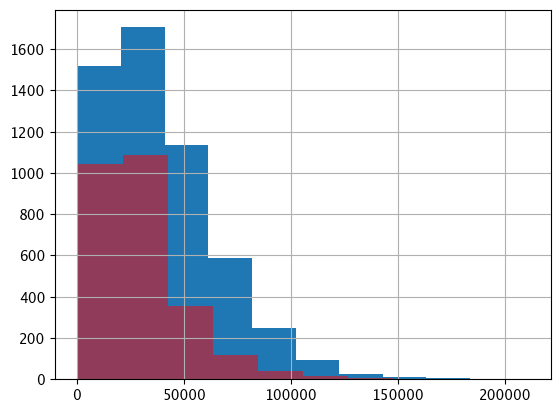

In [102]:
income_males.hist()
income_females.hist(color = 'r', alpha = 0.5)

### Question 5.3. Plot the same data, using a boxplot, splitting by gender (? / 4 points)

<Axes: xlabel='gender', ylabel='income'>

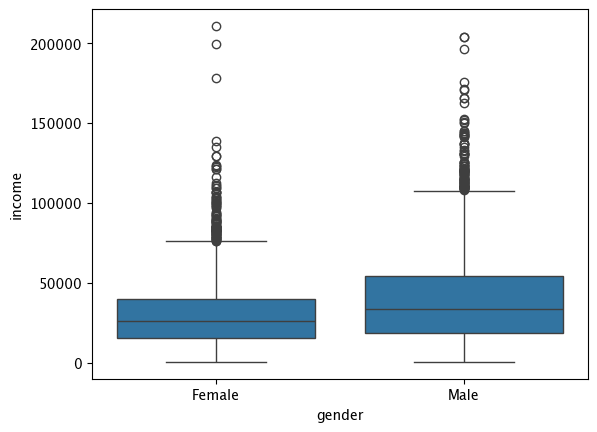

In [106]:
income_data = df[['gender', 'income']]

sns.boxplot(x='gender', y='income', data=income_data)


### Question 5.4. Plot the same data using a violin plot, splitting by gender. (? / 4 points)

<Axes: xlabel='gender', ylabel='income'>

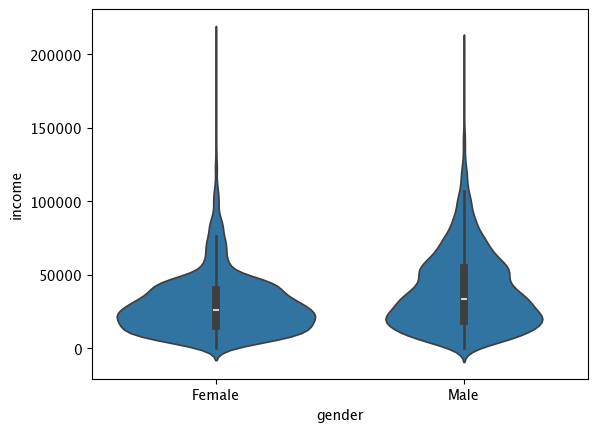

In [111]:
sns.violinplot(x='gender', y='income', data=income_data)


### Question 5.5. Make a boxplot of income split by workclass. (? /4 points)

<Axes: xlabel='workclass', ylabel='income'>

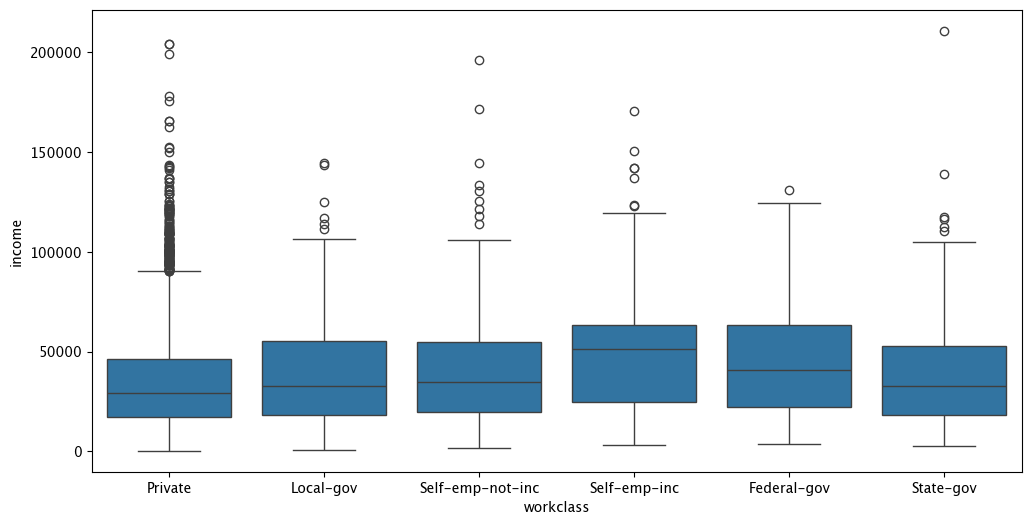

In [113]:
income_data = df[['workclass', 'income']]
plt.figure(figsize=(12, 6))
sns.boxplot(x='workclass', y='income', data=income_data)


### Question 5.6. Make a violin plot of income - with workclass on the x-axis, and then split by gender. In which workclass does the gender pay gap look smallest? (? / 4 points).
Hint: doing plots where the data is split by multiple categories is easy in seaborn - using hue as additional input argument. 


<Axes: xlabel='workclass', ylabel='income'>

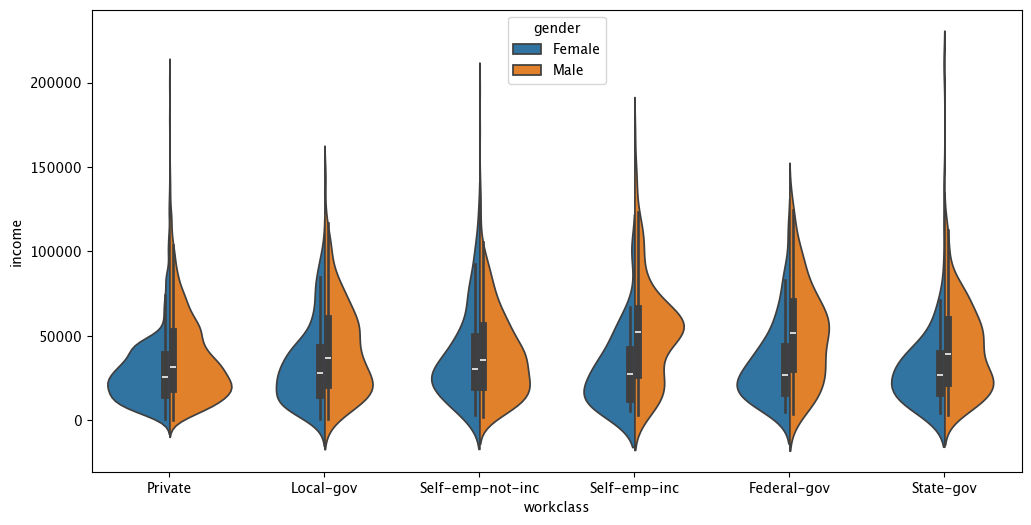

In [114]:
income_data = df[['workclass', 'gender', 'income']]

plt.figure(figsize=(12, 6))


sns.violinplot(x='workclass', y='income', hue='gender', data=income_data, split=True)



The gender pay gap looks the smallest in the self-emp-not-inc workclass